<a href="https://colab.research.google.com/github/Jash-Bhatia/Deep_Learning/blob/main/J007_DL_Lab2_MnistFlask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imporing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import os
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers.advanced_activations import LeakyReLU
#from tqdm.keras import TqdmCallback
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

**Loading Data**

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Image Preprocessing**

In [5]:
train_data,test_data = x_train/255.0, x_test/255.0

**Displaying Images**

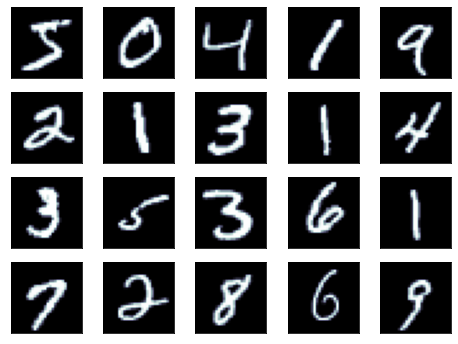

In [6]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)),cmap=plt.cm.bone)

In [7]:
##Scaling

x_train= np.array(x_train)
x_test= np.array(x_test)
x_train= x_train/255
x_test= x_test/255
print(x_train.shape, x_test.shape)

##Reshaping

x_train= x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test= x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


Labeling and Converting to Categorical data


In [8]:
le= LabelEncoder()

y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
datagen = ImageDataGenerator(
        featurewise_center= False,
        samplewise_center= False,
        featurewise_std_normalization= False,
        samplewise_std_normalization= False,
        zca_whitening= False,
        rotation_range= 0.5,
        zoom_range= 0.01,
        width_shift_range= 0.01,
        height_shift_range= 0.01,
        horizontal_flip= False,
        vertical_flip= False,
        validation_split= 0.2)

In [10]:
train= datagen.flow(x_train, y_train, batch_size= 50, seed= 10, subset= 'training')
validation= datagen.flow(x_train, y_train, batch_size= 50, seed= 10, subset= 'validation')

**Building CNN Model**

In [11]:
cnn = Sequential()

cnn.add(Conv2D(64, (3, 3), input_shape= (28, 28, 1)))
cnn.add(LeakyReLU(alpha= 0.1))
cnn.add(MaxPool2D((2, 2)))

cnn.add(Conv2D(128, (2, 2)))
cnn.add(LeakyReLU(alpha= 0.1))
cnn.add(MaxPool2D((2, 2)))

cnn.add(Conv2D(256, (2, 2)))
cnn.add(LeakyReLU(alpha= 0.1))
cnn.add(MaxPool2D((2, 2)))

cnn.add(Flatten())

cnn.add(Dense(128, activation= 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation= 'softmax'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       32896     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 12, 12, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 256)         1

In [13]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="mnist.hdf5",save_weights_only=True,monitor='accuracy',mode='max',save_best_only=True)

es = tf.keras.callbacks.EarlyStopping(monitor='accuracy',min_delta=0.003,patience=10,mode='max',restore_best_weights=True)

In [15]:
history= cnn.fit(train, validation_data= validation, steps_per_epoch= 100, validation_steps= 20, epochs= 100, callbacks= [es])

Epoch 1/100
100/100 [==============================] - 5s 22ms/step - loss: 1.6769 - accuracy: 0.4241 - val_loss: 0.2220 - val_accuracy: 0.9380
Epoch 2/100
100/100 [==============================] - 2s 19ms/step - loss: 0.3713 - accuracy: 0.8846 - val_loss: 0.1591 - val_accuracy: 0.9570
Epoch 3/100
100/100 [==============================] - 2s 19ms/step - loss: 0.2799 - accuracy: 0.9169 - val_loss: 0.1083 - val_accuracy: 0.9640
Epoch 4/100
100/100 [==============================] - 2s 18ms/step - loss: 0.2174 - accuracy: 0.9378 - val_loss: 0.1277 - val_accuracy: 0.9600
Epoch 5/100
100/100 [==============================] - 2s 19ms/step - loss: 0.1936 - accuracy: 0.9410 - val_loss: 0.1235 - val_accuracy: 0.9620
Epoch 6/100
100/100 [==============================] - 2s 19ms/step - loss: 0.1492 - accuracy: 0.9537 - val_loss: 0.1418 - val_accuracy: 0.9590
Epoch 7/100
100/100 [==============================] - 2s 19ms/step - loss: 0.1275 - accuracy: 0.9596 - val_loss: 0.0910 - val_accuracy:

In [16]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9900


[0.034522559493780136, 0.9900000095367432]

**Saving the model**

In [17]:
cnn.save('mnist.h5', save_format='h5')

In [18]:
from keras.models import load_model
newmodel = load_model('mnist.h5')

In [19]:
newmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       32896     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 12, 12, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 256)         1

In [20]:
newmodel.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9900


[0.034522559493780136, 0.9900000095367432]

In [21]:
ypred = cnn.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Flask Depoyment**

In [22]:
!pip install flask gevent requests pillow

In [23]:
procfile = 'web: gunicorn app:app'
procfiles= open("/content/Procfile","w")
procfiles.write(procfile)
procfiles.close()

In [24]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

In [25]:
a = '''
<!doctype html>
<html lang="en">
<head>
</head> 
  <body>
 
          <h3>Image Recognition Server</h3>
       
      <form action="" method=post enctype=multipart/form-data>
        <input type=file name=file>
        <input type=submit value=Upload>
    </form>
    {{label}}  
     
  </body>
  </html>
  '''

In [26]:
!mkdir '/content/templates'
!mkdir '/content/uploads'

Html_file = open("/content/templates/index.html", "w")
Html_file.write(a)
Html_file.close()

mkdir: cannot create directory ‘/content/templates’: File exists
mkdir: cannot create directory ‘/content/uploads’: File exists


In [27]:
from flask import Flask, render_template, request
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

app = Flask(__name__)
run_with_ngrok(app)
app.config['UPLOADS'] = 'uploads'


def load_mymodel():
    global mymodel
    mymodel = load_model('mnist.h5')

@app.route('/')
def home():
    return render_template('index.html')

def predictions(file):
    img = image.load_img(file, target_size=(28,28), color_mode="grayscale")
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    ans = mymodel.predict_classes(img)
    return ans


@app.route('/', methods=['POST'])
def upload_files():
    file = request.files['file']
    filepath = os.path.join(app.config['UPLOADS'], file.filename)
    file.save(filepath)
    output = predictions(filepath)
    return render_template('index.html', label=output)



if __name__=='__main__':
    load_mymodel()
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9b3c8e501099.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
